In [1]:
#import libarary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read data from csv
data_title = ['date','time','type','state','location','BE']
data = pd.read_csv('dataset.csv',header = None, names=data_title)

In [3]:
data.columns

Index(['date', 'time', 'type', 'state', 'location', 'BE'], dtype='object')

In [4]:
pd.unique(data['location'])

array(['R1_Bed_to_Toilet', nan, 'R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
       'Meal_Preparation', 'R2_Personal_Hygiene', 'Watch_TV', 'R1_Work',
       'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
       'Study', 'R1_Bed_to_Toilet_begin', 'R1_Bed_to_Toilet_end'],
      dtype=object)

In [5]:
data_ad = data.copy()

In [6]:
data_ad = data_ad.drop_duplicates()#drop the duplicated values
data_ad = data_ad.dropna(subset=['date', 'time'])#drop the NaN values

In [7]:
data_ad = data_ad[:-1]#drop the error data value

In [8]:
data_ad = data_ad.reset_index(drop=True)

In [9]:
def find_strange_time(data_ad):
    for i in range(data_ad.shape[0]):
        if len(str(data_ad['time'][i])) != 8:
            print(i)
        pass

In [10]:
find_strange_time(data_ad)

70786


In [11]:
data_ad = data_ad.drop(70786)
data_ad = data_ad.reset_index(drop=True)

In [12]:
x_date  = data_ad['date']
x_time  = data_ad['time']
x       = x_date + '/' + x_time

In [13]:
x

0         02/02/2009/07:15:17
1         02/02/2009/07:15:21
2         02/02/2009/07:15:23
3         02/02/2009/07:15:23
4         02/02/2009/07:15:28
                 ...         
137874    04/04/2009/07:26:16
137875    04/04/2009/07:27:47
137876    04/04/2009/07:27:50
137877    04/04/2009/07:27:59
137878    04/04/2009/07:28:01
Length: 137879, dtype: object

In [14]:
pd.to_datetime(x,format= '%d/%m/%Y/%H:%M:%S')

0        2009-02-02 07:15:17
1        2009-02-02 07:15:21
2        2009-02-02 07:15:23
3        2009-02-02 07:15:23
4        2009-02-02 07:15:28
                 ...        
137874   2009-04-04 07:26:16
137875   2009-04-04 07:27:47
137876   2009-04-04 07:27:50
137877   2009-04-04 07:27:59
137878   2009-04-04 07:28:01
Length: 137879, dtype: datetime64[ns]

In [15]:
data_ad.to_pickle('dataset_modified.pkl')

In [16]:
data_ad.to_csv('dataset_modified.csv')

In [88]:
data_ad = pd.read_pickle('dataset_modified.pkl')

In [89]:
data_ad['location'].unique()

array(['R1_Bed_to_Toilet', nan, 'R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
       'Meal_Preparation', 'R2_Personal_Hygiene', 'Watch_TV', 'R1_Work',
       'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
       'Study', 'R1_Bed_to_Toilet_begin', 'R1_Bed_to_Toilet_end'],
      dtype=object)

In [90]:
for i in range(len(data_ad['location'])):
    if data_ad['location'][i] == 'R1_Bed_to_Toilet_begin':
        data_ad['location'][i] = 'R1_Bed_to_Toilet'
        data_ad['BE'][i] = 'begin'
        pass

    if data_ad['location'][i] == 'R1_Bed_to_Toilet_end':
        data_ad['location'][i] = 'R1_Bed_to_Toilet'
        data_ad['BE'][i] = 'end'
        pass

In [91]:
data_ad['location'].unique()

array(['R1_Bed_to_Toilet', nan, 'R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
       'Meal_Preparation', 'R2_Personal_Hygiene', 'Watch_TV', 'R1_Work',
       'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
       'Study'], dtype=object)

In [92]:
data_ad['BE'].value_counts()

end      517
begin    514
Name: BE, dtype: int64

In [93]:
i0=[]
name = ['R1_Bed_to_Toilet','R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
       'Meal_Preparation', 'R2_Personal_Hygiene', 'Watch_TV', 'R1_Work',
       'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
       'Study']

In [94]:
for j in range(len(name)):
    temp=[0,0]
    cnt = 0
    flag = 0
    for i in range(data_ad.shape[0] - 2):
        if data_ad['location'][i] == name[j]:
            temp[cnt] = data_ad['BE'][i]
            i0.append(i)
            if cnt == 0:
                cnt = 1
            else:
                cnt = 0
            if temp[0] == 'end' and temp[1] == 'end':
                print(name[j], 'end error:',i0[-2], i)
                for k in range(i0[-2] + 1, i-1):
                    if data_ad['location'][k] != 'NaN':
                        flag = 1
                        break
                if flag == 1:
                    data_ad = data_ad.drop(i)
                else:
                    data_ad = data_ad.drop(i0[-2])
                data_ad = data_ad.reset_index(drop = True)
                flag = 0;
            elif temp[0] == 'begin' and temp[1] == 'begin':
                print(name[j], 'begin error:',i0[-2], i)
                for k in range(i0[-2] + 1, i-1):
                    if data_ad['location'][k] != 'NaN':
                        flag = 1
                        break
                if flag == 1:
                    data_ad = data_ad.drop(i0[-2])
                else:
                    data_ad = data_ad.drop(i)
                data_ad = data_ad.reset_index(drop = True)
                flag = 0;

Meal_Preparation end error: 130951 131288
R1_Work end error: 123781 126627
R1_Work end error: 132937 134089
R2_Work end error: 69613 71185
R2_Work begin error: 125666 127423


In [95]:
data_ad['BE'].value_counts()

begin    513
end      513
Name: BE, dtype: int64

In [96]:
ord(data_ad['state'][1][0])

50

In [108]:
def detect_state(data_ad):
    temp = []
    for i in range(len(data_ad['state'])):
        if ord(data_ad['state'][i][0]) >= 65 and ord(data_ad['state'][i][0]) <= 90:
            temp.append(data_ad['state'][i])

    df_temp = pd.Series(temp)
    return df_temp.unique()

In [97]:
temp = []
for i in range(len(data_ad['state'])):
    if ord(data_ad['state'][i][0]) >= 65 and ord(data_ad['state'][i][0]) <= 90:
        temp.append(data_ad['state'][i])

In [98]:
df_temp = pd.Series(temp)

In [99]:
df_temp.unique()

array(['ON', 'OFF', 'OPEN', 'CLOSE', 'ABSENT', 'PRESENT', 'ONF', 'OF',
       'O', 'OFFF'], dtype=object)

In [101]:
data_ad0 = data_ad.copy()

In [102]:
data_ad0['state'] = data_ad0['state'].replace('O','ON')
data_ad0['state'] = data_ad0['state'].replace('ONF','ON')
data_ad0['state'] = data_ad0['state'].replace('OF','OFF')
data_ad0['state'] = data_ad0['state'].replace('OFFF','OFF')

In [110]:
d_ad0_unique = detect_state(data_ad0)
d_ad0_unique

array(['ON', 'OFF', 'OPEN', 'CLOSE', 'ABSENT', 'PRESENT'], dtype=object)

In [112]:
data_ad0.to_csv('dataset_modified_v2.csv')
data_ad0.to_pickle('dataset_modified_v2.pkl')

In [ ]:
font = {
    'family':'Times New Roman',
    'weight':'regular',
    'size':16
}

hfont = {
    'family':'Times New Roman',
    'weight':'bold',
    'size':16
}

color   = ['#2372a9','#ef7c21','#349939','#ca2a28','#8b64a8']
blue    = ['#00295f','#1c4476','#c9cddf']

plt.rc('font',**font)

fig,ax = plt.subplots(figsize = (10,4),dpi=80)
ax.plot(x,1,linewidth =2,color = blue[0],label = 'Time line')

In [113]:
data_ad1 = pd.read_pickle('dataset_modified_v2.pkl')

In [115]:
data_ad1.columns

Index(['date', 'time', 'type', 'state', 'location', 'BE'], dtype='object')

In [116]:
data_ad1['type'].unique()

array(['M35', 'AD1-A', 'M34', 'M32', 'M33', 'M36', 'M30', 'M29', 'M37',
       'M38', 'M39', 'M41', 'M40', 'M49', 'M46', 'M50', 'M44', 'M47',
       'M48', 'M43', 'M28', 'M42', 'M27', 'M26', 'M25', 'M24', 'M21',
       'M19', 'M18', 'M17', 'M16', 'M15', 'D09', 'M14', 'M13', 'M08',
       'M07', 'M02', 'M45', 'M51', 'D08', 'AD1-B', 'AD1-C', 'D10', 'I03',
       'M06', 'M09', 'M10', 'M01', 'D12', 'L04', 'M23', 'M31', 'D15',
       'D07', 'D14', 'M11', 'M05', 'M03', 'M04', 'M22', 'M12', 'M20',
       'L11', 'D05', 'D03', 'L10', 'L06', 'L13', 'L12', 'L09'],
      dtype=object)

In [129]:
data_ad1_m = data_ad1.loc[data_ad1['type'].str.contains('M')]
data_ad1_m = data_ad1_m.loc[data_ad1['state'].str.contains('ON')]

In [220]:
M_count = data_ad1_m['type'].value_counts()

In [221]:
M_count_S = pd.Series(M_count)

In [225]:
M_count_Sm = pd.DataFrame({'sensor':M_count_S.index, 'volume':M_count_S.values})

In [228]:
M_count_Sm = M_count_Sm.sort_values(by='sensor').reset_index(drop=True)

In [276]:
position_f1 = pd.read_csv('floor1.csv')
position_f2 = pd.read_csv('floor2.csv')

In [277]:
position_f = pd.concat([position_f1,position_f2])

In [279]:
position_fm = position_f.loc[position_f['sensor'].str.contains('M')]
position_fm = position_fm.sort_values(by='sensor').reset_index(drop=True)

In [182]:
position_f1m = position_f1.loc[position_f1['sensor'].str.contains('M')]
position_f2m = position_f2.loc[position_f2['sensor'].str.contains('M')]

In [196]:
position_f1m = position_f1m.sort_values(by='sensor').reset_index(drop=True)
position_f2m = position_f2m.sort_values(by='sensor').reset_index(drop=True)

In [231]:
x1 = position_f1m['X']
y1 = 671 - position_f1m['Y']

In [232]:
x2 = position_f2m['X']
y2 = 671 - position_f2m['Y']

In [284]:
x = position_fm['X']
y = 671 - position_fm['Y']
freq_d1 = M_count_Sm

In [266]:
freq_d1['volume'].idxmax()

30

In [268]:
freq_d1['sensor'][30]

'M31'

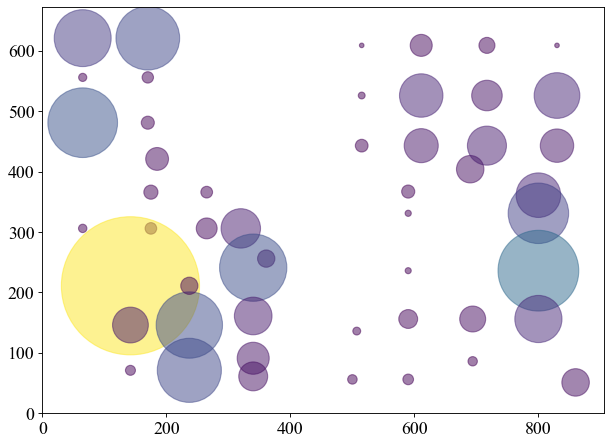

In [289]:
font = {
    'family':'Times New Roman',
    'weight':'regular',
    'size':16
}

hfont = {
    'family':'Times New Roman',
    'weight':'bold',
    'size':16
}

color   = ['#2372a9','#ef7c21','#349939','#ca2a28','#8b64a8']
blue    = ['#00295f','#1c4476','#c9cddf']

plt.rc('font',**font)

fig,ax = plt.subplots(figsize = (9.06,6.72),dpi=80)
ax.set_xlim(0,906)
ax.set_ylim(0,672)
ax.scatter(x, y, c= freq_d1['volume'].values, s= freq_d1['volume'].values, alpha=0.5)

In [290]:
fig.savefig('motion_v1.svg')

time different

In [323]:
data_ad2 = pd.read_pickle('dataset_modified_v2.pkl')

In [324]:
data_ad2m1 = data_ad2.dropna(subset=['location']).reset_index(drop = True)

In [333]:
data_ad2m1

,date,time,type,state,location,BE
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin
1,02/02/2009,07:21:04,M41,OFF,R1_Bed_to_Toilet,end
2,02/02/2009,07:21:04,M40,OFF,R1_Personal_Hygiene,begin
3,02/02/2009,07:38:34,M36,ON,R1_Personal_Hygiene,end
4,02/02/2009,07:44:13,M49,ON,R2_Bed_to_Toilet,begin
...,...,...,...,...,...,...
1021,03/04/2009,20:40:53,M32,OFF,R1_Work,end
1022,03/04/2009,23:47:31,M35,OFF,R1_Sleep,begin
1023,04/04/2009,00:00:49,M48,ON,R2_Sleep,begin
1024,04/04/2009,07:08:46,M35,OFF,R1_Sleep,end


In [332]:
unique_location = data_ad2m1['location'].unique()

In [326]:
x_date  = data_ad2m1['date']
x_time  = data_ad2m1['time']
x       = x_date + '/' + x_time

In [327]:
time_x = pd.to_datetime(x,format= '%d/%m/%Y/%H:%M:%S')

In [335]:
data_ad2m1['duration'] = np.nan

In [336]:
for i in range(len(unique_location)):
    for j in range(len(data_ad2m1)):
        if data_ad2m1['location'][j] == unique_location[i]:
            if data_ad2m1['BE'][j] == 'begin':
                data_ad2m1['duration'][j] = (time_x[j+1] - time_x[j])

C:\Users\karl_\AppData\Local\Temp/ipykernel_23236/1097666344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ad2m1['duration'][j] = (time_x[j+1] - time_x[j])


In [337]:
data_ad2m1

,date,time,type,state,location,BE,duration
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin,0 days 00:05:47
1,02/02/2009,07:21:04,M41,OFF,R1_Bed_to_Toilet,end,NaN
2,02/02/2009,07:21:04,M40,OFF,R1_Personal_Hygiene,begin,0 days 00:17:30
3,02/02/2009,07:38:34,M36,ON,R1_Personal_Hygiene,end,NaN
4,02/02/2009,07:44:13,M49,ON,R2_Bed_to_Toilet,begin,0 days 00:02:42
...,...,...,...,...,...,...,...
1021,03/04/2009,20:40:53,M32,OFF,R1_Work,end,NaN
1022,03/04/2009,23:47:31,M35,OFF,R1_Sleep,begin,0 days 00:13:18
1023,04/04/2009,00:00:49,M48,ON,R2_Sleep,begin,0 days 07:07:57
1024,04/04/2009,07:08:46,M35,OFF,R1_Sleep,end,NaN


In [338]:
data_ad2m1.to_csv('zofia.csv')